<center><h1>Saloni_Fnu _HW2</h1></center>
<br>
<br>

Name: Fnu Saloni
<br>
Github Username: fnusaloni
<br>
USC ID: 3175644840

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore
import statsmodels.api as sm
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.api import OLS, add_constant
from numpy.linalg import cond
from itertools import combinations
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance

Get the Cycle Power Plant Data Set

In [8]:
# reading an excel file
dataRead = pd.read_excel('../data/Folds5x2_pp.xlsx')
dataRead.head()

AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

### (b) Exploring the data

#### i. rows and columns

In [11]:
# calculating the number of rows and columns in the dataset
numOfRows = len(dataRead)
print(f"Total number of rows in the dataset: {numOfRows}")
numOfCols = len(dataRead.columns)
print(f"Total number of columns in the dataset: {numOfCols}")


Total number of rows in the dataset: 9568
Total number of columns in the dataset: 5


What do the rows and columns represent?                       

The dataset contains five columns, each representing different recorded factors which are:
ambient temperature is represented as AT, 
exhaust vacuum is denoted by V, 
ambient pressure is represented as AP,
relative humidity is denoted by RH,
predicted net hourly electrical energy output is represented by PE. 
The rows represent individual hourly records collected over six years. Each row contains the measured values for these conditions at a specific hour. The dataset consists of 9,568 observations (rows), with four independent variables (AT, V, AP, RH) that affect the dependent variable, which is the predicted net hourly electrical energy output (PE).

#### ii. pairwise scatterplots of all the varianbles

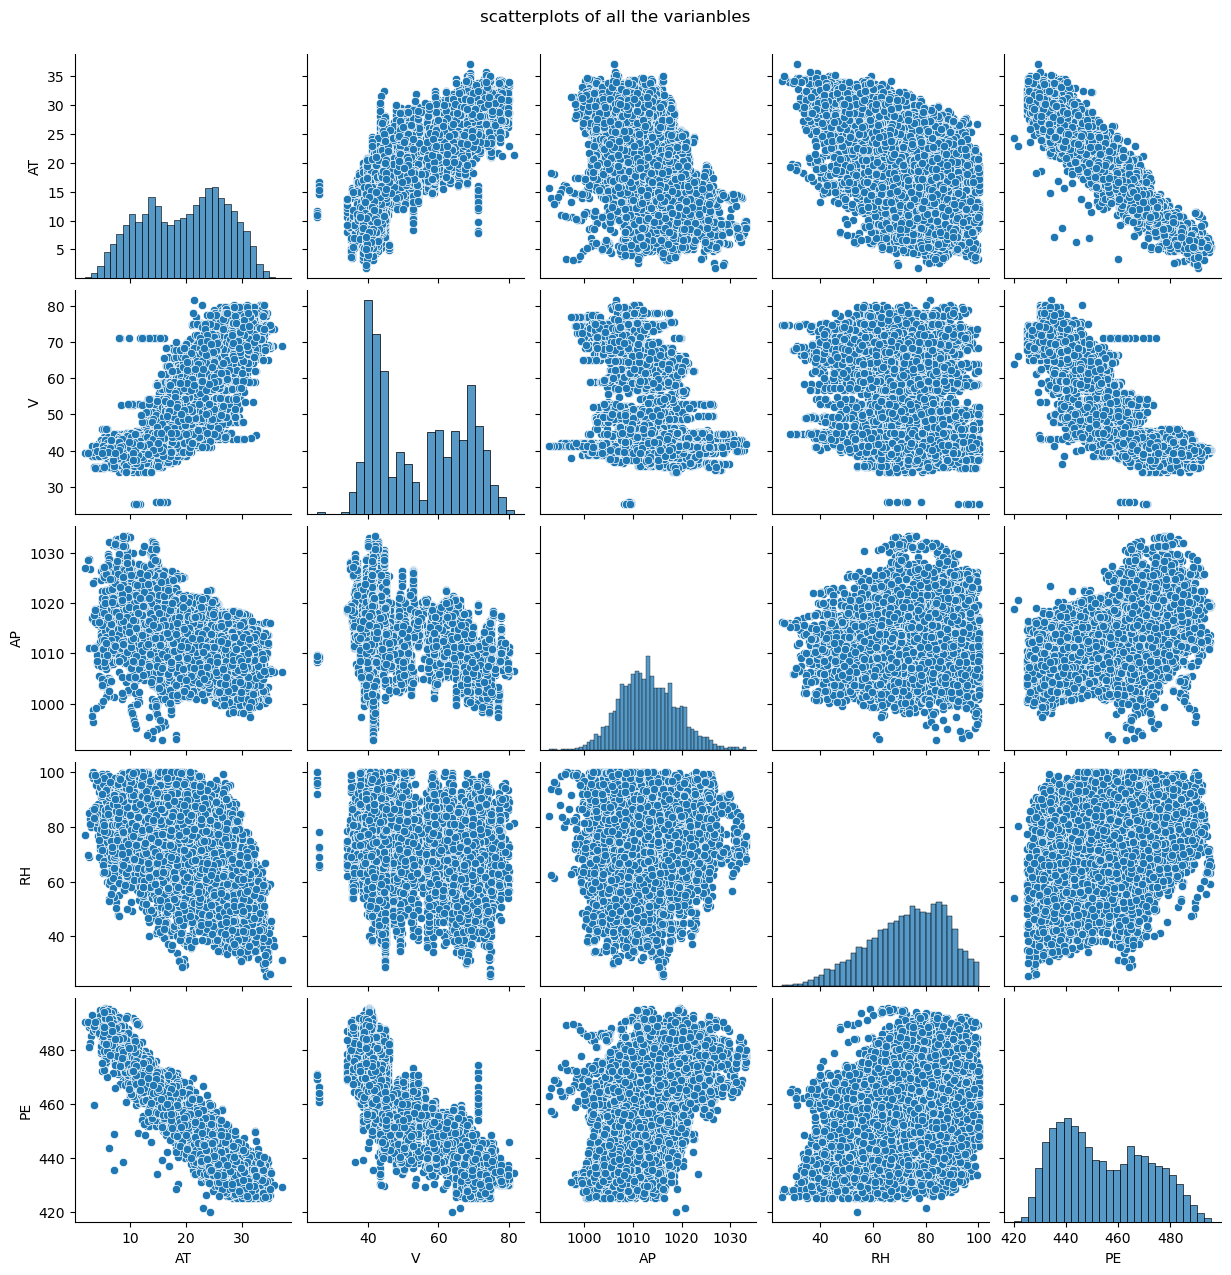

In [15]:
# creating a pairwise scatter plot for all variables in the dataset using pairplot
pairscatterplotDia = sns.pairplot(dataRead)
pairscatterplotDia.fig.suptitle("scatterplots of all the varianbles", y=1.02)
plt.show()

Describe your findings.

We can see:                               
PE shows a strong negative relationship with AT and V. This is clear because the points form a narrow line that slopes downward. 
PE has no clear relationship with AP and RH, as their scatterplots show more spread-out points.
AT and V have a direct connection: as one changes, the other tends to follow a similar trend.
V is inversely related to the PE when vacuum increases, energy output decreases. AT is negatively correlated with PE —higher temperatures lead to lower energy production.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [19]:
# calculating the mean for each column
mean = dataRead.apply(lambda x: x.mean())
# calculating the median for each column
median = dataRead.apply(lambda x: x.median())
# calculating the range for each column
data_range = dataRead.apply(lambda x: x.max() - x.min())
# calculating the interquartile range for each column
iqr = dataRead.apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
# calculating the first quartile for each column
q1 = dataRead.apply(lambda x: x.quantile(0.25))
# calculating the third quartile for each column
q3 = dataRead.apply(lambda x: x.quantile(0.75))

# creating a new dataframe to store all the calculated values
calculationDf = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Range': data_range,
    'Interquartile Range (IQR)': iqr,
    'First Quartile (Q1)': q1,
    'Third Quartile (Q3)': q3
})
# converting the dataframe into a table
table = tabulate(
    calculationDf.reset_index(),
    headers=["Variable", "Mean", "Median", "Range", "Interquartile Range (IQR)", "First Quartile (Q1)", "Third Quartile (Q3)"],
    tablefmt="grid"
)

print(table)

+----+------------+-----------+----------+---------+-----------------------------+-----------------------+-----------------------+
|    | Variable   |      Mean |   Median |   Range |   Interquartile Range (IQR) |   First Quartile (Q1) |   Third Quartile (Q3) |
+====+============+===========+==========+=========+=============================+=======================+=======================+
|  0 | AT         |   19.6512 |   20.345 |   35.3  |                     12.21   |               13.51   |                 25.72 |
+----+------------+-----------+----------+---------+-----------------------------+-----------------------+-----------------------+
|  1 | V          |   54.3058 |   52.08  |   56.2  |                     24.8    |               41.74   |                 66.54 |
+----+------------+-----------+----------+---------+-----------------------------+-----------------------+-----------------------+
|  2 | AP         | 1013.26   | 1012.94  |   40.41 |                      8.16   | 

### (c) Simple Linear Regression


Linear Regression for AT to predict PE:
Intercept: 497.0341, Coefficient for AT: -2.1713
R squared Score: 0.8989
P value: 0.000000
Number of outliers: 42


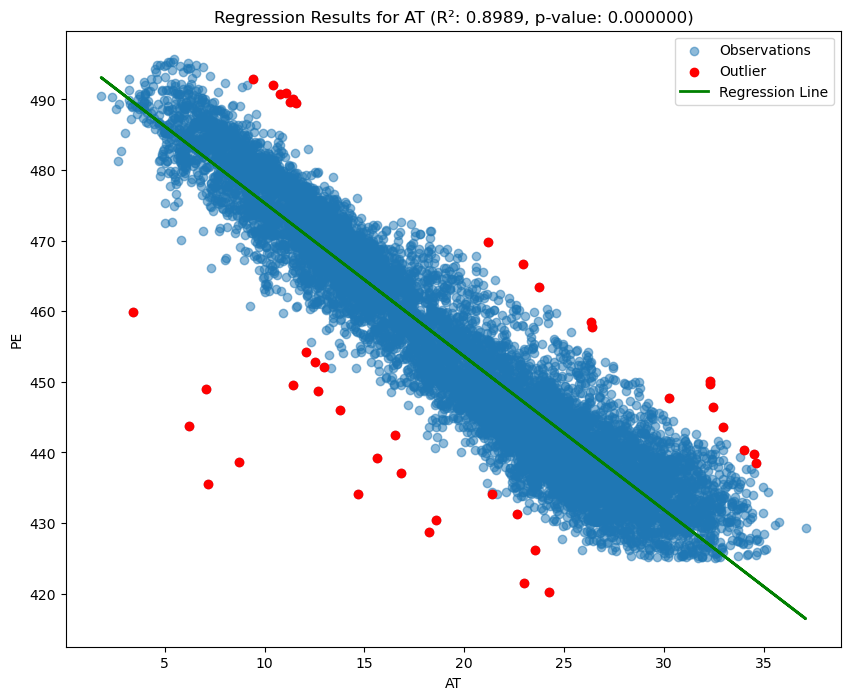


Linear Regression for V to predict PE:
Intercept: 517.8015, Coefficient for V: -1.1681
R squared Score: 0.7565
P value: 0.000000
Number of outliers: 33


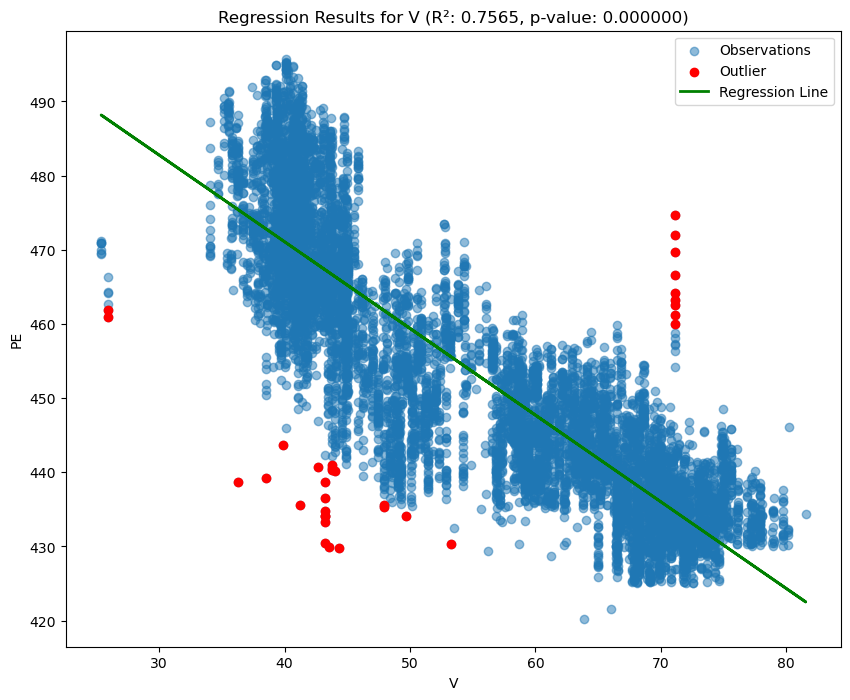


Linear Regression for AP to predict PE:
Intercept: -1055.2610, Coefficient for AP: 1.4899
R squared Score: 0.2688
P value: 0.000000
Number of outliers: 28


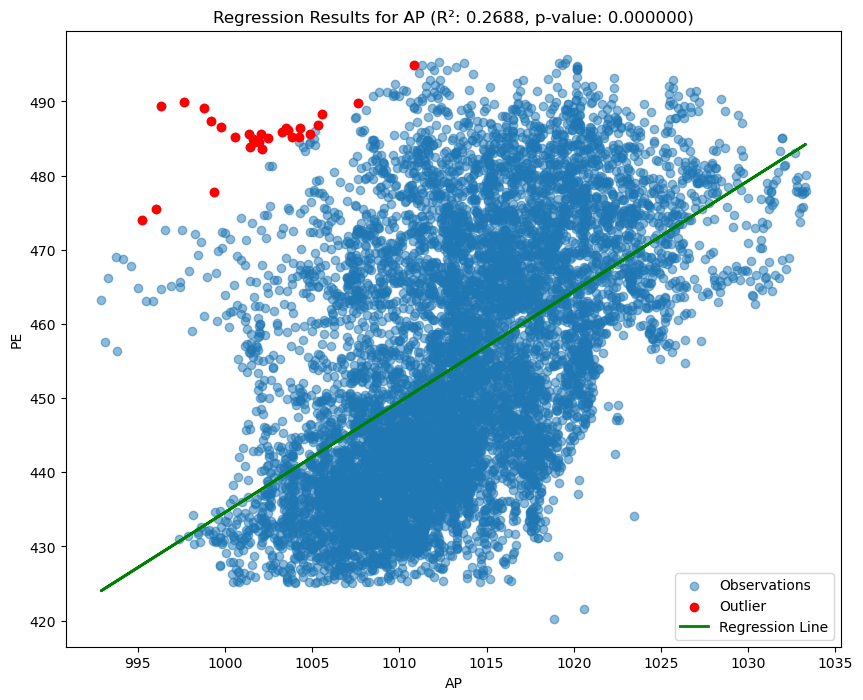


Linear Regression for RH to predict PE:
Intercept: 420.9618, Coefficient for RH: 0.4557
R squared Score: 0.1519
P value: 0.000000
Number of outliers: 2


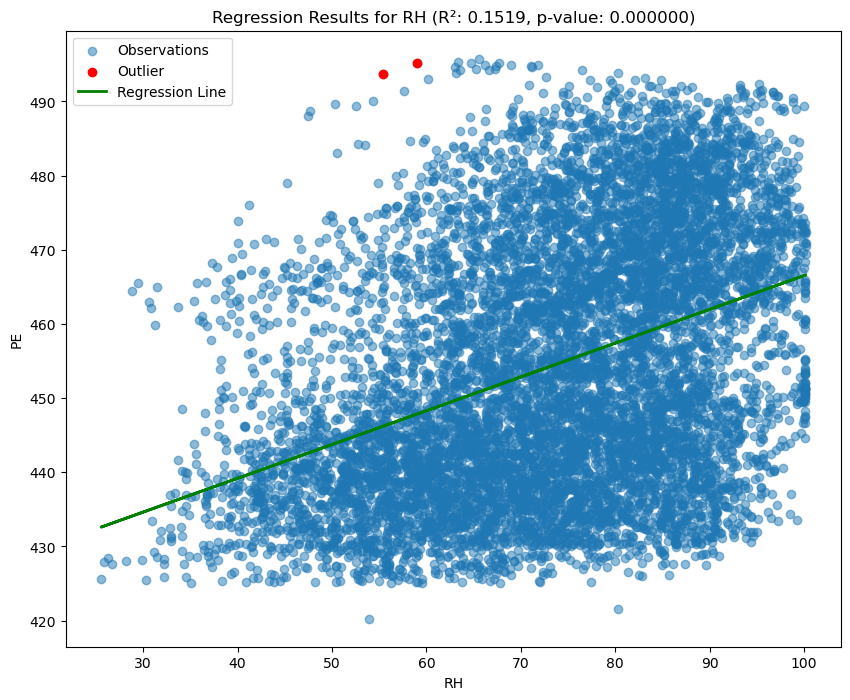

In [21]:
# going through each predictor one by one and building a separate equation for each
predictors = ['AT', 'V', 'AP', 'RH']
output = 'PE'

for predictor in predictors:
    print(f"\nLinear Regression for {predictor} to predict {output}:")

    X = dataRead[[predictor]].copy()  
    y = dataRead[output]  
    
    # adding a constant term to the equation
    X = sm.add_constant(X, has_constant='add') 

    # finding the best straight line that fits the data.
    # FIT,PREDICT,CALCULATE
    model = sm.OLS(y, X).fit()
    
# using the equation to predict power output for each value of the predictor.
    predictions = model.predict(X)

    # analyzing regression output
    # Intercept (c)
    intercept = model.params.iloc[0]
    # Coefficient (m)
    coef = model.params.iloc[1]
    # calculaing r sq
    rSq = model.rsquared
    # calculating p_value
    pValue = float(model.pvalues.iloc[1]) 

    print(f"Intercept: {intercept:.4f}, Coefficient for {predictor}: {coef:.4f}")
    print(f"R squared Score: {rSq:.4f}")
    print(f"P value: {pValue:.6f}") 

    # finding outliers 
    # calculating difference
    res = y - predictions
    # calculating zscore
    zScore = zscore(res)
    # finding index of all datapoints whre zscore is > 3
    outlier = np.where(np.abs(zScore) > 3)[0]

    print(f"Number of outliers: {len(outlier)}")

    XValue = X[predictor].values.flatten()  
    yValue = y.values 

    # plotting the result
    plt.figure(figsize=(10, 8))
    plt.scatter(XValue, yValue, alpha=0.5, label='Observations')
    plt.scatter(XValue[outlier], yValue[outlier], color='red', label='Outlier')
    plt.plot(XValue, predictions, color='green', label='Regression Line', linewidth=2)
    plt.ylabel(output)
    plt.xlabel(predictor)
    plt.title(f"Regression Results for {predictor} (R²: {rSq:.4f}, p-value: {pValue:.6f})")
    plt.legend()
    plt.show()


Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

All predictors (AT, V, AP, RH) are statistically significant because their p-values are < 0.05. AT and V are the strongest predictors because they have the highest R squared values. AP and RH have a smaller effect on PE, but they are still statistically significant. Some outliers were detected, and removing them can improve my model's accuracy.

### (d) Multiple Regression

In [25]:
# taking the predictor variables (X) and output variable (Y) from dataRead
X = dataRead[predictors]  
y = dataRead[output]  

# fitting multiple linear regression model
mrModel = LinearRegression()
mrModel.fit(X, y)

# analyzing regression output
# intercept - beta0
mrIntercept = mrModel.intercept_  
# calculating coefficients
mrCoefficients = mrModel.coef_ 
# # calculaing r sq
mrRSq = mrModel.score(X, y)  

# Calculating pValues for each predictor
mrFValue, mrPValue = f_regression(X, y)  

# Print the results
print("\nMultiple Regression Results:")
print(f"Intercept(constant): {mrIntercept:.4f}")
print("Coefficients for Predictors witrh their respective p value:")
for predictor, coef, p_val in zip(predictors, mrCoefficients, mrPValue):
    significance = "Significant" if p_val < 0.05 else "Not Significant"
    print(f"{predictor}: {coef:.4f}, P Value: {p_val:.6f} ({significance})")

print(f"\nR squared Score: {mrRSq:.4f}") 



Multiple Regression Results:
Intercept(constant): 454.6093
Coefficients for Predictors witrh their respective p value:
AT: -1.9775, P Value: 0.000000 (Significant)
V: -0.2339, P Value: 0.000000 (Significant)
AP: 0.0621, P Value: 0.000000 (Significant)
RH: -0.1581, P Value: 0.000000 (Significant)

R squared Score: 0.9287


Describe your results.For which predictors can we reject the null hypothesis H0 :βj =0?                            

Since all predictors have p-values < 0.05, we reject the null hypothesis (H₀: βj = 0) for all four predictors.

### (e) 1c Compare to 1d


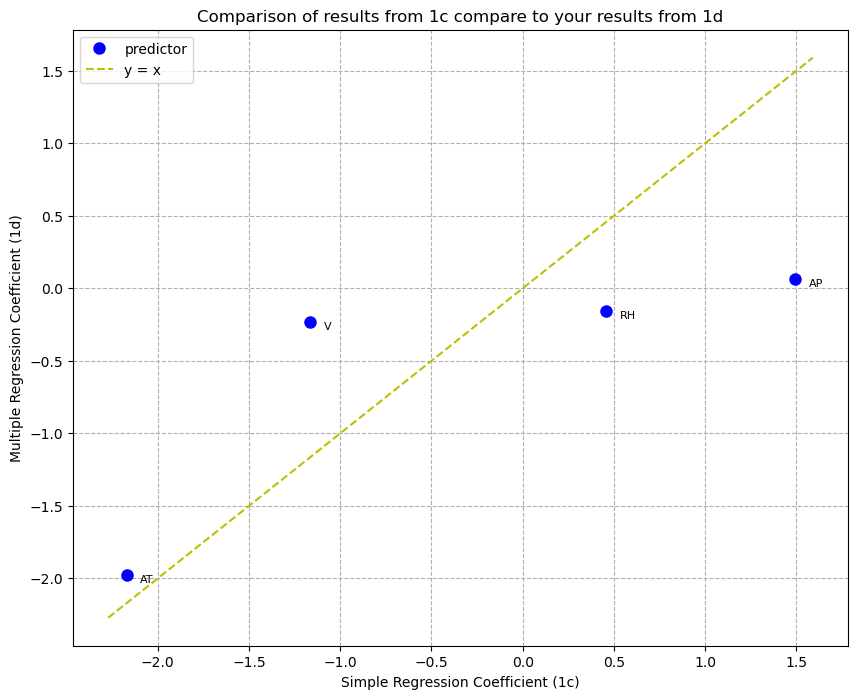

In [29]:
# storing linear regression coefficients for each predictor
lrCoeffs = {}

# looping through each predictor in the dataset to perform simple linear regression
for predictor in predictors:
    X = dataRead[[predictor]].copy()  
    y = dataRead[output]  
    # adding a constant term - intercept
    X = sm.add_constant(X, has_constant='add')  
    # creating and fitting an OLS regression model 
    model = sm.OLS(y, X).fit()  
    # getting the coefficient of the predictor variable
    coef = model.params.iloc[1]  
    lrCoeffs[predictor] = coef  
# creating a scatter plot
plt.figure(figsize=(10, 8))
plt.plot(list(lrCoeffs.values()), mrCoefficients, 'bo', markersize=8, label='predictor')

# labeling each predictor with its name in the scatter plot
for predictor, xVal, yVal in zip(predictors, lrCoeffs.values(), mrCoefficients):
    plt.annotate(predictor, (xVal, yVal), textcoords="offset points", xytext=(10, -5), fontsize=8)

# finding line y = x
lineStart = min(lrCoeffs.values()) - 0.1
lineEnd = max(lrCoeffs.values()) + 0.1
plt.title('Comparison of results from 1c compare to your results from 1d', fontsize=12)
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'y--', label="y = x")
plt.ylabel('Multiple Regression Coefficient (1d)')
plt.xlabel('Simple Regression Coefficient (1c)')
plt.grid(linestyle='--')
plt.legend()
plt.show()


### (f) Nonlinear Association


condition number for AT: 1.90e+05
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:30:14   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.

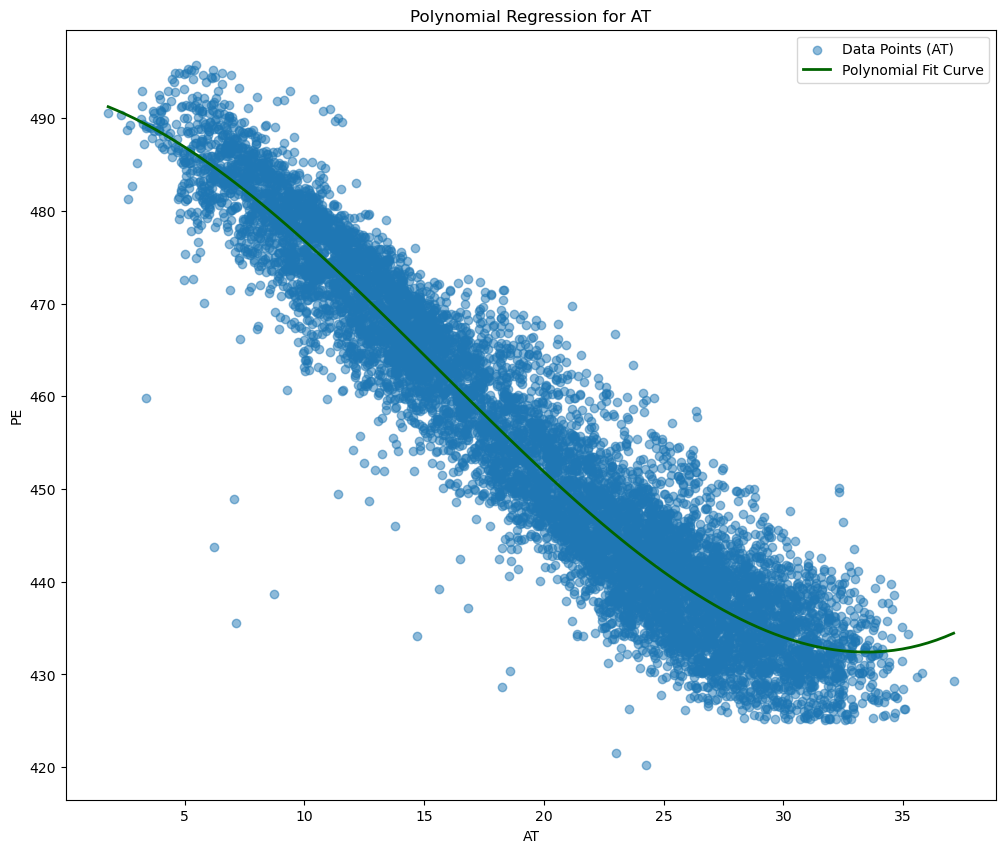


condition number for V: 2.47e+07
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:30:14   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1

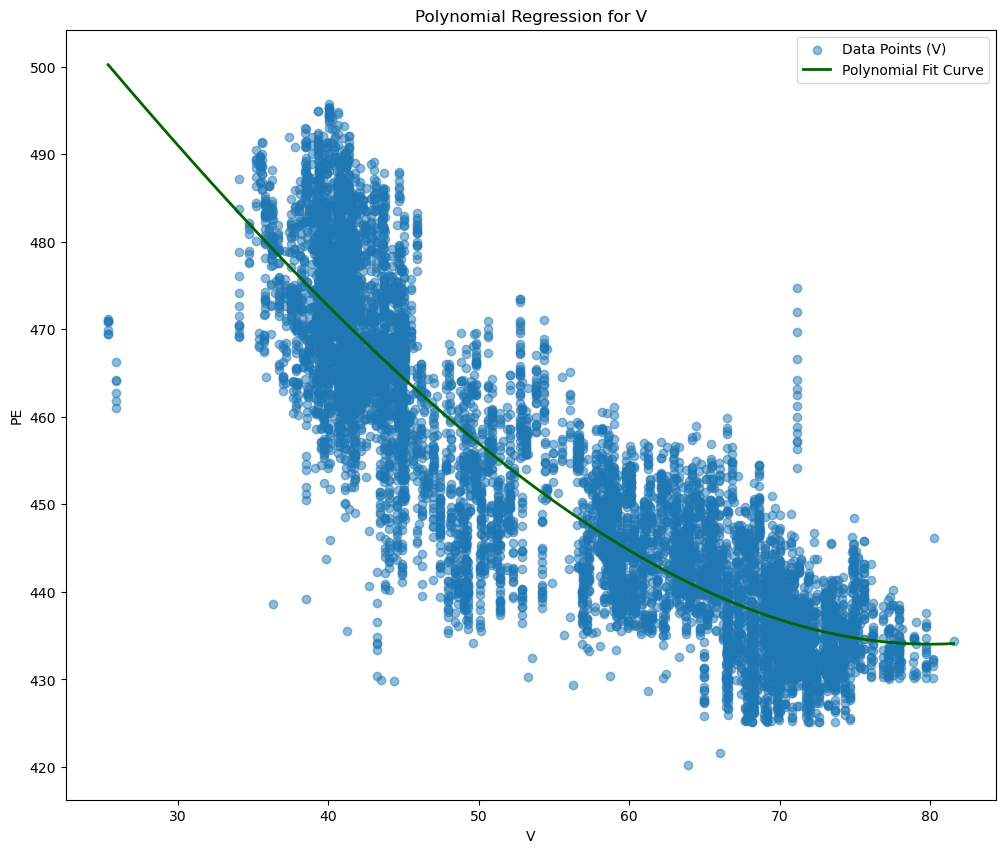


condition number for AP: 2.12e+15
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:30:14   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.

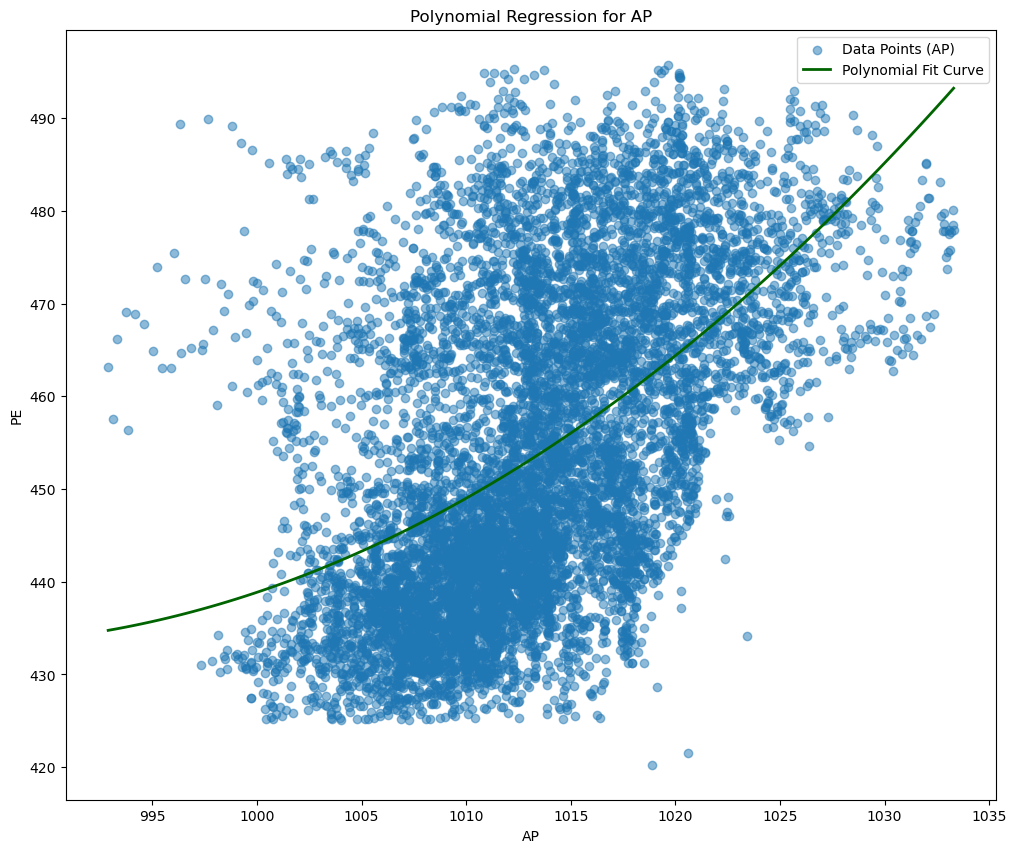


condition number for RH: 3.26e+07
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:30:14   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.

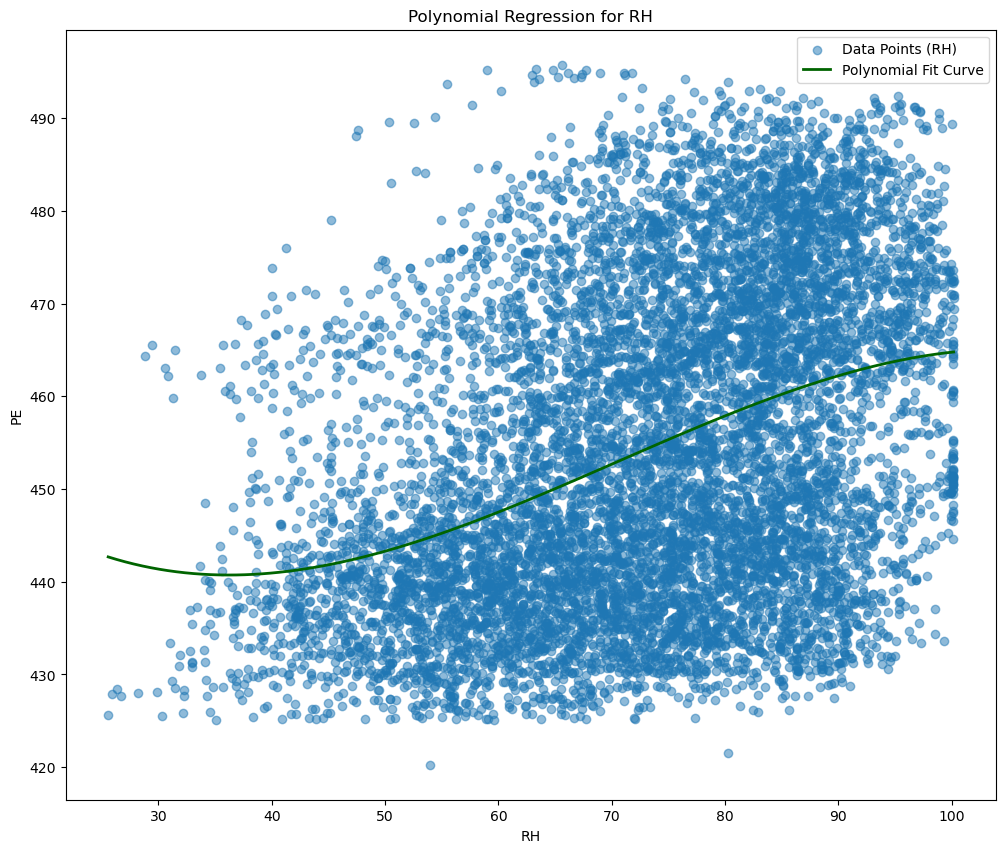

In [31]:
# defining a function for polynomial regression
def polynomialRegression(predictor, output, degree=3):
    Y = dataRead[output]  
    X = dataRead[[predictor]].values  

    # creating polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    # getting polynomial terms
    XPoly = poly.fit_transform(X)  
    # adding constant for regression 
    XPolySm = add_constant(XPoly)  

    # fittig the model
    polyModel = OLS(Y, XPolySm).fit()

    # calculating the condition number
    conditionNo = polyModel.condition_number
    print(f"\ncondition number for {predictor}: {conditionNo:.2e}")
    print(polyModel.summary())

    # ploting the data points
    plt.figure(figsize=(12, 10))
    # creating a scatter plot
    plt.scatter(X, Y, alpha=0.5, label=f"Data Points ({predictor})")

    # creating a set of X values ranging from the minimum to maximum X values and plotting the polynomial curve
    xRange = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    xRangePoly = poly.transform(xRange) 
    xRangePolySm = add_constant(xRangePoly)
    yRangePred = polyModel.predict(xRangePolySm)

    # labeling the polynomial fit curve
    plt.plot(xRange, yRangePred, color='darkgreen', linewidth=2, label="Polynomial Fit Curve")
    plt.xlabel(predictor)
    plt.ylabel(output)
    plt.legend()
    plt.title(f"Polynomial Regression for {predictor}")
    plt.show()

# running the regression separately for each predictor
polynomialRegression('AT', 'PE')
polynomialRegression('V', 'PE')
polynomialRegression('AP', 'PE')
polynomialRegression('RH', 'PE')


From the above results we can say that: 

AT shows a clear non-linear relationship with PE. V Shows minimal evidence of a non-linear relationship with PE. AP Exhibits a non-linear relationship with PE. RH Also displays a non-linear association with PE. The null hypothesis can be rejected for the predictors AT, AP, and RH, as their p-values are 0.00, indicating significant evidence of non-linear relationships with PE. For the predictor V, the null hypothesis cannot be rejected, as there isn’t enough evidence to support a strong non-linear association between V and PE.

### (g) Interactions of Predictors

In [35]:
# taking the predictor variables (X) and output variable (Y) from dataRead
X = dataRead[predictors].copy()
Y = dataRead[output]

# creating pairwise interaction terms of predictors
interactionPair = pd.DataFrame()
for term1, term2 in combinations(predictors, 2):  # All unique pairs
    interactionPair[f"{term1} * {term2}"] = X[term1] * X[term2]

# merging the original predictors with the newly created interaction terms
XInteraction = pd.concat([X, interactionPair], axis=1)

# adding constant term for regression model
XInteractionSm = sm.add_constant(XInteraction)

# fitting the regression model with all predictors and interaction terms
fitModel = sm.OLS(Y, XInteractionSm).fit()

# storing results in a dataframe
result = pd.DataFrame({
    "Feature": fitModel.params.index,
    "Coefficient": fitModel.params.values,
    "Standard Error": fitModel.bse.values,
    "P-Value": fitModel.pvalues.values,
    "t-Statistic": fitModel.tvalues.values
})

# printing the  summary
summaryTb = fitModel.summary().as_text()
print(summaryTb)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:30:15   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

From the above result the below mentioned predictor pairs have a strong effect on PE when combined because their p-values are below 0.05. These pairs are:
AT and V
AT and RH
V and AP
AP and RH

### (h) Improvement

In [38]:
# spliting the dataset into 70% training and 30% testing.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#fit, predict, calculate

# fitting a linear regression model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

# predicting on train and test sets
linear_y_trainPred = linearModel.predict(X_train)
linear_y_testPred = linearModel.predict(X_test)

# calculating MSE for linear model
linearTrainMse = mean_squared_error(y_train, linear_y_trainPred)
linearTestMse = mean_squared_error(y_test, linear_y_testPred)

# creating polynomial features up to degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
# training Polynomial Regression Model
X_trainPoly = poly.fit_transform(X_train)
X_testPoly = poly.transform(X_test)

polyModel = LinearRegression()
polyModel.fit(X_trainPoly, y_train)

# Predicting on train and test sets
poly_yTrainPred = polyModel.predict(X_trainPoly)
poly_yTestPred = polyModel.predict(X_testPoly)

# calculating MSE for polynomial model for all terms
polyTrainMse = mean_squared_error(y_train, poly_yTrainPred)
polyTestMse = mean_squared_error(y_test, poly_yTestPred)

# converting polynomial features into a dataframe
namesFeature = poly.get_feature_names_out(input_features=X.columns)
X_trainPolyDf = pd.DataFrame(X_trainPoly, columns=namesFeature)

# adding a constant term (intercept)
X_trainPolyDf = sm.add_constant(X_trainPolyDf) 
y_train = y_train.reset_index(drop=True) 

# fitting an OLS regression model to calculate p values.
olsModel = sm.OLS(y_train, X_trainPolyDf).fit()

pValues = olsModel.pvalues

# sorting features by p value 
pValuesNames = sorted(zip(X_trainPolyDf.columns, pValues), key=lambda x: x[1])

print("feature name - p value")
print("\n")
for feature, pValue in pValuesNames:
    print(f"{feature}: {pValue:.6f}")

# removing insignificant features
selectedFeatures = list(X_trainPolyDf.columns)  

# removing features with p value > 0.05 
for feature, pValue in pValuesNames:
    if pValue > 0.05 and feature != 'const':  
        selectedFeatures.remove(feature)
if 'V' not in selectedFeatures:
    selectedFeatures.append('V')

print("Selected Significant Features:", selectedFeatures)

# converting X_testPoly into dataframe and keeping only selected features.
X_testPolyDf = pd.DataFrame(X_testPoly, columns=namesFeature)
X_testPolyDf = sm.add_constant(X_testPolyDf) 

X_trainPolySig = X_trainPolyDf[selectedFeatures]
X_testPolySig = X_testPolyDf[selectedFeatures]

#fit, predict, calculate

# training a new polynomial regression model with only significant features.
polyModelSig = LinearRegression()
polyModelSig.fit(X_trainPolySig, y_train)

# predicting on train and test sets with significant features
poly_yTrainPredSig = polyModelSig.predict(X_trainPolySig)
poly_yTestPredSig = polyModelSig.predict(X_testPolySig)

# calculating MSE for polynomial model for significant features
polyTrainMseSig = mean_squared_error(y_train, poly_yTrainPredSig)
polyTestMseSig = mean_squared_error(y_test, poly_yTestPredSig)

# displaying final MSE
print(f"Linear Model MSE(Train): {linearTrainMse:.4f}, MSE(Test): {linearTestMse:.4f}")
print(f"Polynomial Model MSE(Train) for All Terms: {polyTrainMse:.4f}, MSE(Test) for All Terms: {polyTestMse:.4f}")
print(f"Polynomial Model MSE(Train) for Significant Terms: {polyTrainMseSig:.4f}, MSE(Test) for Significant Terms: {polyTestMseSig:.4f}")


feature name - p value


RH^2: 0.000000
AP^2: 0.000000
AP: 0.000000
const: 0.000000
AT^2: 0.000001
RH: 0.000143
AP RH: 0.000294
AT RH: 0.003056
AT V: 0.003195
AT: 0.044606
AT AP: 0.196631
V: 0.267182
V AP: 0.381180
V^2: 0.699802
V RH: 0.867382
Selected Significant Features: ['const', 'AT', 'AP', 'RH', 'AT^2', 'AT V', 'AT RH', 'AP^2', 'AP RH', 'RH^2', 'V']
Linear Model MSE(Train): 20.5808, MSE(Test): 21.2399
Polynomial Model MSE(Train) for All Terms: 17.8878, MSE(Test) for All Terms: 18.6473
Polynomial Model MSE(Train) for Significant Terms: 17.9178, MSE(Test) for Significant Terms: 18.6943


### (i) KNN

Best k for Raw Features: 5, best test error: 15.7268


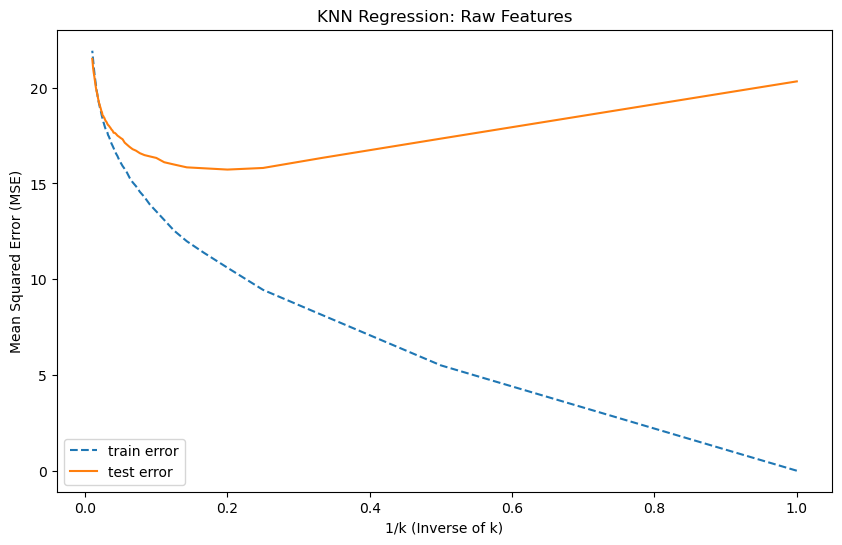

Best k for Normalized Features: 4, best test error: 14.3057


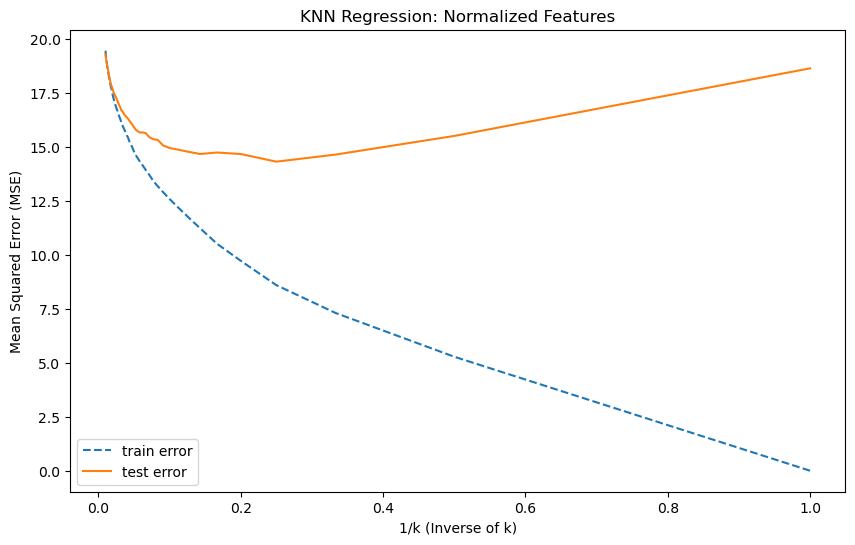


Results:
Raw Features - Best k: 5, Best Test MSE: 15.7268
Normalized Features - Best k: 4, Best Test MSE: 14.3057


In [40]:
# defining function to run KNN Regression on raw or normalized festures
def knnReg(X_train, X_test, y_train, y_test, title, ifNormalized=False):
    # checking if it is normalized
    if ifNormalized:
        # scaling features using standardscaler()
        stdScaler = StandardScaler()
        X_train = stdScaler.fit_transform(X_train)
        X_test = stdScaler.transform(X_test)

    # the value of k ∈ {1,2,...,100}
    kValues = list(range(1, 101)) 
    # storing result in these
    trainErList = []
    testErList = []

    # looping over different k values
    for k in kValues:
        knnR = KNeighborsRegressor(n_neighbors=k)
        knnR.fit(X_train, y_train)

        # calculating MSE for training and testing sets
        trainErList.append(mean_squared_error(y_train, knnR.predict(X_train)))
        testErList.append(mean_squared_error(y_test, knnR.predict(X_test)))

    # finding the k which gives the lowest test error
    bestK = kValues[np.argmin(testErList)]
    bestTestErr = min(testErList)

    print(f"Best k for {title}: {bestK}, best test error: {bestTestErr:.4f}")

    # ploting train and test errors vs 1/k 
    plt.figure(figsize=(10, 6))
    plt.plot(1/np.array(kValues), trainErList, label="train error", linestyle="dashed")
    plt.plot(1/np.array(kValues), testErList, label="test error", linestyle="solid")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.xlabel("1/k (Inverse of k)")
    plt.title(f"KNN Regression: {title}")
    plt.legend()
    plt.show()

    return trainErList, testErList, bestK, bestTestErr  

# spliting the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# runing KNN Regression without normalization.
trainErrRaw, testErrRaw, bestKRaw, bestTestErrRaw = knnReg(
    X_train, X_test, y_train, y_test, title="Raw Features", ifNormalized=False)

# runing KNN Regression with normalization.
trainErrNorm, testErrNorm, bestKNorm, bestTestErrNorm = knnReg(
    X_train, X_test, y_train, y_test, title="Normalized Features", ifNormalized=True)

# displaying the best k values and MSE for both raw and normalized data
print("\nResults:")
print(f"Raw Features - Best k: {bestKRaw}, Best Test MSE: {bestTestErrRaw:.4f}")
print(f"Normalized Features - Best k: {bestKNorm}, Best Test MSE: {bestTestErrNorm:.4f}")


### (j ) Compare KNN and Linear

                                       Model  Best k   Test MSE  \
0                                  KNN (Raw)     5.0  15.726820   
1                                 KNN (Norm)     4.0  14.305669   
2                          Linear Regression     NaN  20.580840   
3          Polynomial Regression (All Terms)     NaN  18.647312   
4  Polynomial Regression (Significant Terms)     NaN  18.694346   

   % Change from Linear  
0            -23.585140  
1            -30.490351  
2              0.000000  
3             -9.394793  
4             -9.166261  


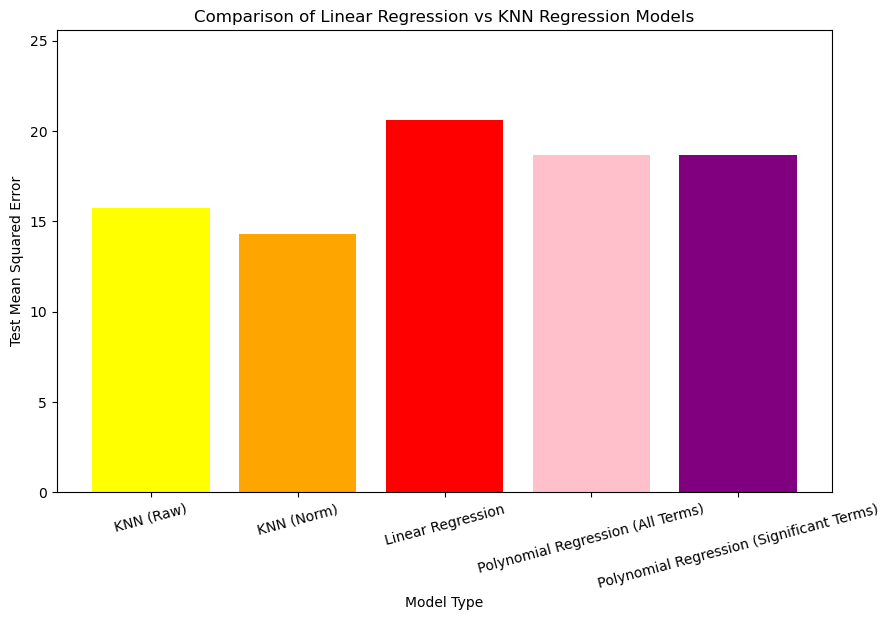

In [42]:
# storing the best k with its MSE
res = {
    "Model": ["KNN (Raw)", "KNN (Norm)", "Linear Regression", "Polynomial Regression (All Terms)", "Polynomial Regression (Significant Terms)"],
    "Best k": [bestKRaw, bestKNorm, None, None, None],
    "Test MSE": [bestTestErrRaw, bestTestErrNorm, linearTrainMse, polyTestMse, polyTestMseSig]
}

# calculating how much each model changes compared to Linear Regression
res["% Change from Linear"] = [
    ((bestTestErrRaw - linearTrainMse) / linearTrainMse) * 100,
    ((bestTestErrNorm - linearTrainMse) / linearTrainMse) * 100,
    0,  
    ((polyTestMse - linearTrainMse) / linearTrainMse) * 100,
    ((polyTestMseSig - linearTrainMse) / linearTrainMse) * 100
]

# creating and showing dataframe 
resDf = pd.DataFrame(res)
print(resDf)

# plotting bar chart for comparison
plt.figure(figsize=(10,6))
plt.bar(resDf["Model"], resDf["Test MSE"], color=['yellow', 'orange', 'red', 'pink', 'purple'])
plt.ylabel("Test Mean Squared Error")
plt.xlabel("Model Type")
plt.title("Comparison of Linear Regression vs KNN Regression Models")
plt.ylim(0, max(resDf["Test MSE"]) + 5)
plt.xticks(rotation=15)
plt.show()


KNN Regression performed better than Linear Regression because it can handle complex patterns in the data, while Linear Regression assumes a straight-line relationship between variables. Since real-world data is often non-linear, KNN, makes predictions based on nearby points and adapts better. In this case KNN had a lower test error 14.3057 compared to Linear Regression 18.6473, meaning it made more accurate predictions. This shows that for this dataset, KNN Regression is a better choice than Linear Regression.

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

When the sample size n is very large but the number of predictors p is small, a more flexible model tends to perform better than a rigid one.This is because it can capture complex patterns in the data, making them more accurate. On the other hand, a rigid model might might struggle to fully understand these relationships, leading to underfitting. With a large amount of data available, a flexible model has more opportunities to learn and adjust, allowing it to make better predictions compared to a strict, less adaptable approach.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

When there are too many predictors p but only a small amount of observations, a flexible model can struggle because it might start fitting to random noise instead of learning real patterns, overfitting, where the model performs well on the training data but poorly on new data. In such cases, a simpler, more rigid model is usually a better choice because it focuses on the most important relationships and avoids getting distracted by unnecessary details.

### (c) The relationship between the predictors and response is highly non-linear.

When the relationship between the predictors and the response is highly non-linear, a simple, rigid model will struggle because it assumes a straight-line pattern and can’t adjust to the twists and turns in the data. In contrast, a more flexible model can adapt to these complexities, making it better at capturing the true patterns. Because of this, flexible models usually perform much better in non-linear situations, while rigid models does not perform well.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

When the error variance is high, it means the data has a lot of randomness. If a model is too flexible, it might try to learn from this noise instead of the actual pattern, which can cause overfitting, where the model performs well on training data but poorly on new data. On the other hand, a simpler, less flexible model is better in this situation because it focuses on the main trend rather than getting distracted by the noise. This helps it make more reliable predictions.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

The Euclidean distance between two points in an n-dimensional space is given by the formula d = square root ( (x1-y1)^2 + (x2-y2)^2 + (x3-y3)^2 ------- + (xn-yn)^2 ).  For this specific test point, the formula simplifies to 
d = square root( (x1)^2 + (x2)^2 + (x3)^2 )

In [56]:
# defining 2D array with the given values
X = np.array([[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]])

point = np.array([0, 0, 0])

# calculating euclidean distances
euclideanDis = np.apply_along_axis(lambda row: distance.euclidean(row, point), axis=1, arr=X)

# creating the dataframe for showing the result
disDf = pd.DataFrame({"Observation": [1, 2, 3, 4, 5, 6], "Euclidean Distance": euclideanDis})

# showing the dataframe
disDf

Observation  Euclidean Distance
0            1            3.000000
1            2            2.000000
2            3            3.162278
3            4            2.236068
4            5            1.414214
5            6            1.732051

### (b) What is our prediction with K = 1? Why?

From the above calculated euclidean distances, Observation 5 has the smallest distance from the test point. Since the Y label for Observation 5 is Green, therefore our prediction for K=1 is Green.

### (c) What is our prediction with K = 3? Why?

For K = 3, we look at the three closest points to the test point based on the Euclidean distances calculated earlier.The three nearest neighbors are Observation 5 (Green), Observation 6 (Red), Observation 2 (Red). So there 2 red and 1 green in total. So using majority vote rule, prediction for K=3 is Red

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

If the Bayes decision boundary is highly non-linear, a smaller K is better. A small 
K allows the model to capture complex patterns by focusing on nearby points. A larger 
K would smooth out predictions, making the model less flexible. Since we need adaptability to the non-linear boundary, a small K is preferred.

## References

https://docs.python.org/3/library/itertools.html
https://www.statsmodels.org/dev/generated/statsmodels.tools.tools.add_constant.html
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
https://numpy.org/doc/2.1/reference/generated/numpy.array.html
https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html